In [1]:
import pandas as pd

title_ = pd.read_csv(r"C:\Shaan\Network_ana\title.basics.tsv\title.basics.tsv",sep='\t',usecols=["tconst", "primaryTitle","startYear","titleType"])

In [2]:
title_.startYear=pd.to_numeric(title_.startYear, errors='coerce')

In [3]:
title_.head()

,tconst,titleType,primaryTitle,startYear
0,tt0000001,short,Carmencita,1894.0
1,tt0000002,short,Le clown et ses chiens,1892.0
2,tt0000003,short,Poor Pierrot,1892.0
3,tt0000004,short,Un bon bock,1892.0
4,tt0000005,short,Blacksmith Scene,1893.0


In [3]:
name_ = pd.read_csv(r"C:\Shaan\Network_ana\name.basics.tsv\name.basics.tsv",sep='\t',usecols=["nconst", "primaryName"])


In [5]:
name_.head()

,nconst,primaryName
0,nm0000001,Fred Astaire
1,nm0000002,Lauren Bacall
2,nm0000003,Brigitte Bardot
3,nm0000004,John Belushi
4,nm0000005,Ingmar Bergman


In [ ]:
# original_title = title_[title_['isOriginalTitle'] == 1]
# Y2K_title = title_[title_['startYear'] > 1999]

In [ ]:
# original_title.head()
# len(Y2K_title)

7783551

In [9]:
# name_["knownForTitles"].head()

In [4]:
principals_df = pd.read_csv(r"C:\Shaan\Network_ana\title.principals.tsv\title.principals.tsv", sep="\t",usecols=["tconst", "nconst", "category"])

In [7]:
principals_df.head()

,tconst,nconst,category
0,tt0000001,nm1588970,self
1,tt0000001,nm0005690,director
2,tt0000001,nm0005690,producer
3,tt0000001,nm0374658,cinematographer
4,tt0000002,nm0721526,director


In [5]:
rating_df = pd.read_csv(r"C:\Shaan\Network_ana\title.ratings.tsv\title.ratings.tsv", sep="\t",usecols=["tconst", "averageRating"])

In [6]:
principals_df = principals_df.merge(name_,on="nconst")

In [10]:
principals_df

,tconst,nconst,category,primaryName
0,tt0000001,nm1588970,self,Carmencita
1,tt0000001,nm0005690,director,William K.L. Dickson
2,tt0000001,nm0005690,producer,William K.L. Dickson
3,tt0000001,nm0374658,cinematographer,William Heise
4,tt0000002,nm0721526,director,Émile Reynaud
...,...,...,...,...
91237552,tt9916880,nm0996406,director,Hilary Audus
91237553,tt9916880,nm1482639,writer,Lucinda Whiteley
91237554,tt9916880,nm2586970,writer,Francesca Simon
91237555,tt9916880,nm1594058,producer,Erica Angell


In [11]:
directors_df = principals_df[principals_df["category"] == "director"]
actors_df = principals_df[principals_df["category"].isin(["actor", "actress"])]

In [12]:
director_actor_edges = directors_df.merge(actors_df, on="tconst", suffixes=("_dir", "_act"))

In [13]:
director_actor_edges

,tconst,nconst_dir,category_dir,primaryName_dir,nconst_act,category_act,primaryName_act
0,tt0000007,nm0005690,director,William K.L. Dickson,nm0179163,actor,James J. Corbett
1,tt0000007,nm0005690,director,William K.L. Dickson,nm0183947,actor,Peter Courtney
2,tt0000007,nm0374658,director,William Heise,nm0179163,actor,James J. Corbett
3,tt0000007,nm0374658,director,William Heise,nm0183947,actor,Peter Courtney
4,tt0000008,nm0005690,director,William K.L. Dickson,nm0653028,actor,Fred Ott
...,...,...,...,...,...,...,...
40019700,tt9916880,nm0996406,director,Hilary Audus,nm2676923,actress,Joanna Ruiz
40019701,tt9916880,nm0996406,director,Hilary Audus,nm2676923,actress,Joanna Ruiz
40019702,tt9916880,nm0996406,director,Hilary Audus,nm2676923,actress,Joanna Ruiz
40019703,tt9916880,nm0996406,director,Hilary Audus,nm1469295,actress,Emma Tate


In [14]:
director_actor_edges = director_actor_edges.merge(title_,on="tconst")
director_actor_edges = director_actor_edges.merge(rating_df,on="tconst")


In [15]:
director_actor_edges

,tconst,nconst_dir,category_dir,primaryName_dir,nconst_act,category_act,primaryName_act,titleType,primaryTitle,startYear,averageRating
0,tt0000007,nm0005690,director,William K.L. Dickson,nm0179163,actor,James J. Corbett,short,Corbett and Courtney Before the Kinetograph,1894.0,5.3
1,tt0000007,nm0005690,director,William K.L. Dickson,nm0183947,actor,Peter Courtney,short,Corbett and Courtney Before the Kinetograph,1894.0,5.3
2,tt0000007,nm0374658,director,William Heise,nm0179163,actor,James J. Corbett,short,Corbett and Courtney Before the Kinetograph,1894.0,5.3
3,tt0000007,nm0374658,director,William Heise,nm0183947,actor,Peter Courtney,short,Corbett and Courtney Before the Kinetograph,1894.0,5.3
4,tt0000008,nm0005690,director,William K.L. Dickson,nm0653028,actor,Fred Ott,short,Edison Kinetoscopic Record of a Sneeze,1894.0,5.4
...,...,...,...,...,...,...,...,...,...,...,...
10025637,tt9916880,nm0996406,director,Hilary Audus,nm2676923,actress,Joanna Ruiz,tvEpisode,Horrid Henry Knows It All,2014.0,7.7
10025638,tt9916880,nm0996406,director,Hilary Audus,nm2676923,actress,Joanna Ruiz,tvEpisode,Horrid Henry Knows It All,2014.0,7.7
10025639,tt9916880,nm0996406,director,Hilary Audus,nm2676923,actress,Joanna Ruiz,tvEpisode,Horrid Henry Knows It All,2014.0,7.7
10025640,tt9916880,nm0996406,director,Hilary Audus,nm1469295,actress,Emma Tate,tvEpisode,Horrid Henry Knows It All,2014.0,7.7


In [16]:
director_actor_edges.to_csv("director_actor_graph_types.csv", index=False)

In [ ]:
principals_df= principals_df[principals_df['startYear'] > 1999]

In [9]:
len(principals_df)

91237557

In [13]:
director_actor_edges

,tconst,nconst_dir,category_dir,primaryName_dir,titleType_dir,primaryTitle_dir,startYear_dir,nconst_act,category_act,primaryName_act,titleType_act,primaryTitle_act,startYear_act
0,tt0000007,nm0005690,director,William K.L. Dickson,short,Corbett and Courtney Before the Kinetograph,1894.0,nm0179163,actor,James J. Corbett,short,Corbett and Courtney Before the Kinetograph,1894.0
1,tt0000007,nm0005690,director,William K.L. Dickson,short,Corbett and Courtney Before the Kinetograph,1894.0,nm0183947,actor,Peter Courtney,short,Corbett and Courtney Before the Kinetograph,1894.0
2,tt0000007,nm0374658,director,William Heise,short,Corbett and Courtney Before the Kinetograph,1894.0,nm0179163,actor,James J. Corbett,short,Corbett and Courtney Before the Kinetograph,1894.0
3,tt0000007,nm0374658,director,William Heise,short,Corbett and Courtney Before the Kinetograph,1894.0,nm0183947,actor,Peter Courtney,short,Corbett and Courtney Before the Kinetograph,1894.0
4,tt0000008,nm0005690,director,William K.L. Dickson,short,Edison Kinetoscopic Record of a Sneeze,1894.0,nm0653028,actor,Fred Ott,short,Edison Kinetoscopic Record of a Sneeze,1894.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40019700,tt9916880,nm0996406,director,Hilary Audus,tvEpisode,Horrid Henry Knows It All,2014.0,nm2676923,actress,Joanna Ruiz,tvEpisode,Horrid Henry Knows It All,2014.0
40019701,tt9916880,nm0996406,director,Hilary Audus,tvEpisode,Horrid Henry Knows It All,2014.0,nm2676923,actress,Joanna Ruiz,tvEpisode,Horrid Henry Knows It All,2014.0
40019702,tt9916880,nm0996406,director,Hilary Audus,tvEpisode,Horrid Henry Knows It All,2014.0,nm2676923,actress,Joanna Ruiz,tvEpisode,Horrid Henry Knows It All,2014.0
40019703,tt9916880,nm0996406,director,Hilary Audus,tvEpisode,Horrid Henry Knows It All,2014.0,nm1469295,actress,Emma Tate,tvEpisode,Horrid Henry Knows It All,2014.0


In [14]:
director_actor = director_actor_edges[["primaryName_dir", "primaryName_act", "primaryTitle_dir","startYear_dir","titleType_dir"]]

In [15]:
director_actor.to_csv("director_actor_graph_types.csv", index=False)

In [22]:
crew = principals_df[principals_df["category"] != "director"]


In [23]:
director_crew_edges = directors_df.merge(crew, on="tconst", suffixes=("_dir", "_crew"))[
    ["primaryName_dir", "primaryName_crew", "primaryTitle_dir"]
]

MemoryError: Unable to allocate 633. MiB for an array with shape (1, 82962119) and data type object

In [10]:
director_actor_edges = director_actor_edges.merge(name_, left_on="nconst_dir", right_index=True) \
                                           .rename(columns={"primaryName": "Director"}) 

In [11]:
director_actor_edges = director_actor_edges.merge(name_, left_on="nconst_act", right_index=True) \
                                           .rename(columns={"primaryName": "Actor"}) 

In [21]:
director_actor_edges.head()

,nconst_dir,nconst_act,Director,Actor
tconst,,,,
tt0000007,nm0005690,nm0179163,William K.L. Dickson,James J. Corbett
tt0000007,nm0005690,nm0183947,William K.L. Dickson,Peter Courtney
tt0000007,nm0374658,nm0179163,William Heise,James J. Corbett
tt0000007,nm0374658,nm0183947,William Heise,Peter Courtney
tt0000008,nm0005690,nm0653028,William K.L. Dickson,Fred Ott


In [ ]:
# director_actor_edges = director_actor_edges.join(original_title["title"])


In [13]:
director_actor_edges

,nconst_dir,nconst_act,Director,Actor,title
tconst,,,,,
tt0000007,nm0005690,nm0179163,William K.L. Dickson,James J. Corbett,Corbett and Courtney Before the Kinetograph
tt0000007,nm0005690,nm0183947,William K.L. Dickson,Peter Courtney,Corbett and Courtney Before the Kinetograph
tt0000007,nm0374658,nm0179163,William Heise,James J. Corbett,Corbett and Courtney Before the Kinetograph
tt0000007,nm0374658,nm0183947,William Heise,Peter Courtney,Corbett and Courtney Before the Kinetograph
tt0000008,nm0005690,nm0653028,William K.L. Dickson,Fred Ott,Edison Kinetoscopic Record of a Sneeze
...,...,...,...,...,...
tt9916856,nm10538645,nm10538647,Johan Planefeldt,Kathrin Knöpfle,The Wind
tt9916856,nm10538645,nm10538651,Johan Planefeldt,Beatrice Bresolin,The Wind
tt9916856,nm10538645,nm10538648,Johan Planefeldt,Amit Goldenberg,The Wind


In [14]:
director_actor_edges = director_actor_edges[["Director", "Actor", "title"]]


In [27]:
import networkx as nx
import matplotlib.pyplot as plt

In [28]:
G = nx.Graph()

In [29]:
director_actor_only = director_actor_edges[["Director", "Actor"]]

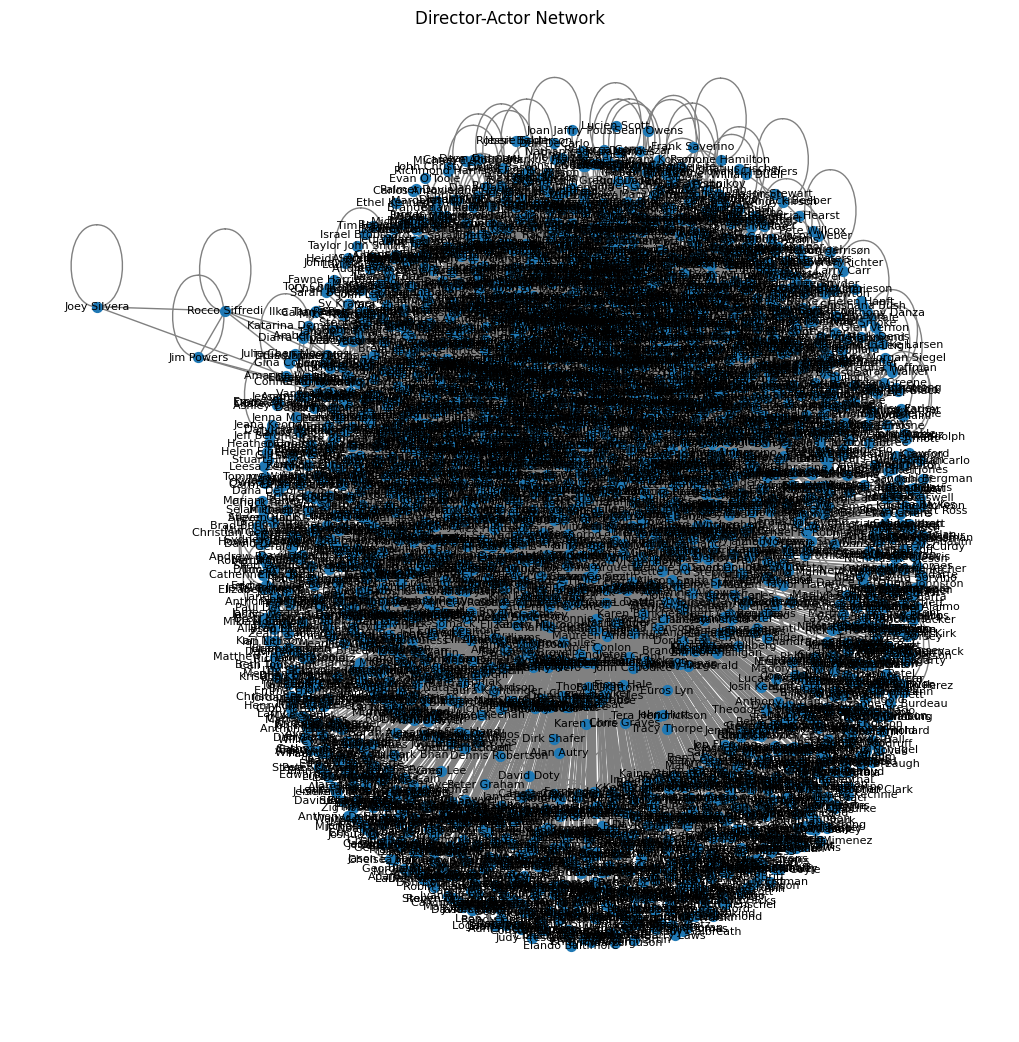

In [31]:
# Add edges between directors and actors
G.add_edges_from(list(director_actor_only.itertuples(index=False,name=None)))

# Compute centrality (who is most connected)?
degree_centrality = nx.degree_centrality(G)

# Get top 10 most connected directors
top_directors = sorted(degree_centrality,key=degree_centrality.get,reverse=True)[:10]

# Visualization (small graph for clarity)
plt.figure(figsize=(10,10))
subgraph = G.subgraph(top_directors + list(G.neighbors(top_directors[0]))) # Small sample
nx.draw(subgraph,with_labels=True,node_size=50,edge_color="gray",font_size=8)
plt.title("Director-Actor Network")
plt.show()

In [33]:
all_people = pd.concat([director_actor_edges["Director"], director_actor_edges["Actor"]]).unique()
all_people

array(['William K.L. Dickson', 'William Heise', 'Alexander Black', ...,
       'Andreas Demmel', 'Amit Goldenberg', 'Adrian Iselin'], dtype=object)

In [34]:
nodes_df = pd.DataFrame({"Id": all_people, "Label": all_people, "Type": "Person"})


In [35]:
nodes_df.to_csv("nodes.csv", index=False)


In [36]:
edges_df = director_actor_only.rename(columns={"Director": "Source", "Actor": "Target"})
edges_df["Weight"] = 1  # Default weight for collaboration

# Save edges
edges_df.to_csv("edges.csv", index=False)